### Simple Bivariate Linear Regression with Python Scikit Learn

#### Rima Kundu

In this regression task we will predict the marks that a student is expected to score based upon the number of hours they studied. We will use Python Scikit Learn Library. This is a simple linear regression task as it involves just two variables.


In [1]:
#importing necessary libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
#importing dataset from the remote link
dataset=pd.read_csv('http://bit.ly/w-data')
print("Data imported successfully")
dataset.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
#let's check the number of rows and columns in our datasets
dataset.shape

(25, 2)

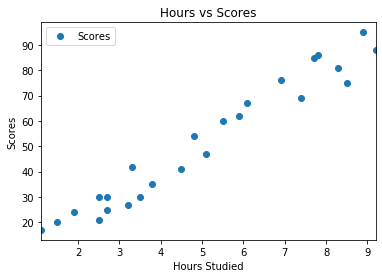

In [4]:
#let’s plot our data points on a 2-D graph
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Scores')  
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score. 

### Preparing the data
The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [5]:
#let's divide the data into “attributes” and “labels”
X = dataset['Hours'].values.reshape(-1,1)
y = dataset['Scores'].values.reshape(-1,1)

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [6]:
#training and splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
#let's check the number of rows and columns of train data and test data
X_train.shape, X_test.shape

((20, 1), (5, 1))

### Training the Algorithm
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [8]:
#training the algorithm
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training complete.")

Training complete.


In [9]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[2.01816004]
[[9.91065648]]


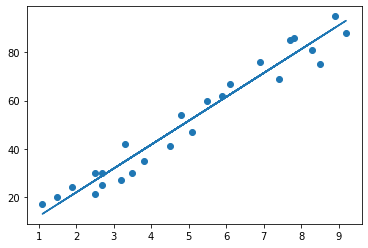

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

### Making Predictions

Now that we have trained our algorithm, it's time to make some predictions.


In [11]:
#testing data - in Hours
print(X_test) 
#predicting the scores
y_pred = regressor.predict(X_test) 

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
#comparing actual vs predicted
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
#the predicted score if a student study for 9.25 hrs in a day
hours = np.array(9.25).reshape(1,-1)
pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = [93.69173249]


### Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [14]:
#evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
